# What is a Decision Tree? 🌳
Imagine you are playing "20 Questions." You ask yes/no questions to guess what someone is thinking. A decision tree works the same way! It keeps asking questions (splitting the data) until it reaches a final decision (a class label like "Yes" or "No").

# Steps to Implement:
- Choose the Best Question (Which feature should we split on?)
- Split the Data (Divide it into two groups based on the question)
- Repeat Until Done (Keep splitting until each group is pure, meaning all points belong to one class)


# First I will start by generating a simple dataset which will classify the points . Let there be two classes in which the points can be classified into -  Class 0 and Class 1 based on two features (X1 and X2)

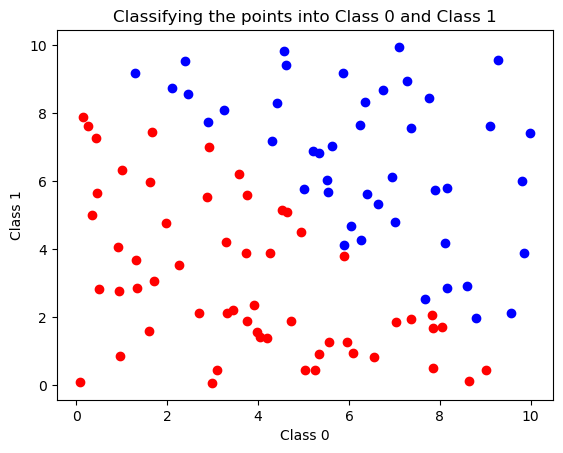

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Creating the feactures X1 and X2 
np.random.seed(32)  # using this will give us the same random points each time
X1=np.random.uniform(0,10,100)
X2=np.random.uniform(0,10,100)


# Creating a simple expression for our Decision Tree . Say supoose that expression is y= (X1+X2)>10
y=(X1+X2>10).astype(int)  # since the condition will return a boolean values so converting it to int type

# Now classifying the points into Class 0 and Class 1
plt.scatter(X1[y==0],X2[y==0],color='red',label='Class 0')
plt.scatter(X1[y==1],X2[y==1],color='blue',label='Class 1')
plt.xlabel('Class 0')
plt.ylabel('Class 1')
plt.title('Classifying the points into Class 0 and Class 1')
plt.show()

In [15]:
y

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0])

# The next step is to create a Toy dataset with features (X1, X2) and labels (y) for classification that we will use to build our decision tree 

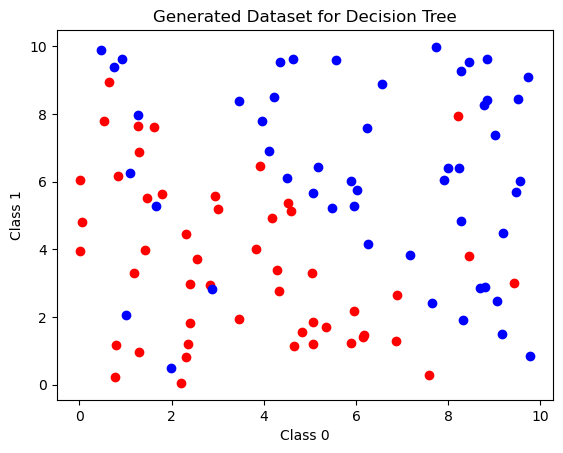

In [16]:
# create n random points 
np.random.seed(23)
samples=100
X1=np.random.uniform(0,10,samples)
X2=np.random.uniform(0,10,samples)

# Step 2: Create labels based on a rule (Example: If X1 + X2 > 10, label it as 1, else 0)
y=(X1+X2>10).astype(int) # Convert True/False to 1/0

# Add = Noise by picking 10% random points flipping their label from 0 to 1 and 1 to 0
flip_indices=np.random.choice(samples,size=int(0.1*samples),replace=False) 
# size=(0.1*samples),replace=False  This randomly selects 10% of the data points 
# replace=False means no repeats, so we pick unique points

y[flip_indices]=1-y[flip_indices]  #This flips the label at those selected points.If y=1,it changes to 0.If y=0,it changes to 1.


# Labelling the points to class 0 and Class 1
plt.scatter(X1[y==0],X2[y==0],color='red',label='Class 0')
plt.scatter(X1[y==1],X2[y==1],color='blue',label='Class 1')
plt.xlabel('Class 0')
plt.ylabel('Class 1')
plt.title('Generated Dataset for Decision Tree')
plt.show()

# Splitting the Data based on a feature(X1 OR X2) and a threshold value (example :Should we split at X1 > 2?) and measuring how "good" a split is using Entropy or Gini Index 

# Step 1 : Implement  Entropy 
Entropy is the measure of randomness or uncertainity in the data.If entropy close to 1 means data has high entropy/uncertainity
entropy  0 means data is pure data / no uncertainity.

In [17]:
# For Implementing the entropy formula we will have to calulate 3 this :
# 1. The counts of unique values in y
# 2. Probability of the unique values of y 
# 3. Implement the Entropy formula for each value 
def entropy(y):
    # counts of unique values in y
    values,count=np.unique(y,return_counts=True)
    # return_counts=True tells numpy to return both- unique values and thier count as well, If we don't write this it will return
    # just the unique values 0,1.
   
    # Calculate the probabilities 
    probability=count/len(y)  # P =  No. of occurences / Total number of samples 


    # Calculate the Entropy
    return -np.sum(probability*np.log2(probability))


# Step 2: Implement Information Gain
Information gain is the matrix use to implement decision trees . IG tells us how much the entropy reduces after the data is split. The goal is to split the data in a way that maximizes IF and reduces entropy.


- Information Gain=Entropy before split−Weighted Entropy after split
- Information Gain =  Parent(entropy) - {weighted average}*Child(entropy) 

We will:
- Compute entropy before the split.
- Compute entropy for each split (left & right).
- Take the weighted average of the new entropies.
- Subtract from the original entropy to get Information Gain.

In [18]:
def InformationGain(y,y_left,y_right):
    # Compute Parent Entropy or  entropy before the split
    Parent_entropy = entropy(y)
    
    # Compute Child Entropy or entropy for each split (left & right)
    left_entropy=entropy(y_left)
    right_entropy=entropy(y_right)
    
    # Calculate weights
    left_weight=len(y_left)/len(y)
    right_weight=len(y_right)/len(y)
    
    # Compute weighted average of the new entropies.
    weighted_average=(left_weight*left_entropy)+(right_weight*right_entropy)
    
    # Calculate Information Gain
    information_gain=Parent_entropy-weighted_average
    return information_gain

# Understanding the Best Split
# We need to find:
- Which feature (X1 or X2) gives the highest Information Gain.
- Which threshold (specific value in X1 or X2) makes the best split.

# How do we do that?
- 👉 Try each feature one by one.
- 👉 Try different threshold values for each feature.
- 👉 Calculate Information Gain for every possible split.
- 👉 Pick the feature & threshold with the highest Information Gain!

Imagine you are sorting toys into two boxes 🎁🎁
You have a big pile of toys (data points) and you want to split them into two boxes in the best way!

But how do we decide where to cut the pile? 🤔
We try different ways and see which one keeps the toys best organized (gives the highest Information Gain).

In [19]:
def best_split(X,y):
    best_gain=0 # Track max Information Gain
    best_features=None  # Best feature to split on
    best_threshold=None  # Best threshold value
    
    n_samples,n_features=X.shape   # Number of samples & features
    
    # Step 1 : we will try every toys feature
    for feature in range(n_features): #looping through one feature(like color,size) at a time to check if its a good way to split
        thresholds=np.unique(X[:,feature])  #Get all unique values in this feature as thresholds
        
        
        # Step 2: Try different split points 
        # We try each value as a possible split point (like saying, "Put all small toys in one box and big toys in another").
        for threshold in thresholds:
            # We divide the data based on the threshold value into two groups left group and right group
            left_indices=X[:,feature]<=threshold
            right_indices=X[:,feature]>threshold
            y_left,y_right=y[left_indices],y[right_indices]
            
            # make sure the split is valid. Is its not then we skip that split
            if len(y_left)==0 or len(y_right)==0:
                continue
            # Check how good the split is by calculating its information gain
            gain=InformationGain(y,y_left,y_right)
            
            # Store the best split or update the split which is the best
            if gain>best_gain:
                best_gain = gain
                best_feature = feature
                best_threshold = threshold
                
    return best_feature, best_threshold
        

In [20]:
def best_split(X, y):
    best_gain = 0  # Track max Information Gain
    best_feature = None  # Best feature to split on
    best_threshold = None  # Best threshold value
    
    n_samples, n_features = X.shape  # Number of samples & features
    
    for feature in range(n_features):  # Iterate through each feature
        thresholds = np.unique(X[:, feature])  # Unique values as possible split points
        
        for threshold in thresholds:
            # Divide data based on the threshold value
            left_indices = X[:, feature] <= threshold
            right_indices = X[:, feature] > threshold
            y_left, y_right = y[left_indices], y[right_indices]
            
            # Ensure valid split
            if len(y_left) == 0 or len(y_right) == 0:
                continue
            
            # Compute Information Gain
            gain = InformationGain(y, y_left, y_right)
            
            if gain > best_gain:
                best_gain = gain
                best_feature = feature
                best_threshold = threshold

    return best_feature, best_threshold  # Ensure function returns a tuple

Now that we have found the best split, the next task is to build the decision tree recursively. 

# Building the Decision tree Recursively

# Stopping Conditions 
- All labels are the same 
- Depth limit reached 
- Not enough samples 


In [21]:
def Stopping_conditions(y,current_depth,max_depth,min_sample_split):
    
    # Stopping conditions (when to stop splitting)
        # 1. All labels are the same -> If all samples in a node belong to the same class, we stop. No need to split further
        if len(np.unique(y))==1: # If there is only 1 unique value in y 
            return int(y[0])  # Return that label
        
        # 2. Depth limit reached -> We set a maximum depth for the tree to prevent it from growing too deep.
        if current_depth>=max_depth : # if the current depth of the tree exceeds the max depth
            most_common_label=np.bincount(y).argmax() # bincount(y) will return the count of the labels 0/1 in y
            # while argmax() will return the index position of the label having the maximum count in bincount()
            return int(most_common_label)
        
        # 3. Not enough samples -> If a node has very few samples left, we stop splitting.
        if len(y)<min_sample_split:
            most_common_label=np.bincount(y).argmax()
            return int(most_common_label)
        
        return None # If No stopping condition is met, we continue splitting


# Steps to perform while building the tree : 
- Stopping conditions (when to stop splitting)
    
-  Step 1: Find the best split
    best_feature, best_threshold = best_split(X, y)
    
-  Step 2: If no good split, create a leaf node (final answer)
    
-  Step 3: Split the data into left and right parts
    
-  Step 4: Create left and right child nodes (recursively call build_tree)
    
-  Step 5: Return the node (so it connects the tree)

In [22]:
def build_decision_tree(X,y,current_depth=0,max_depth=5,min_sample_split=2):
    # Initally we we check if we should stop splitting
    if Stopping_conditions(y,current_depth,max_depth,min_sample_split):
        return np.bincount(y).argmax()  # Return the most_common_label as the leaf node
    
    # Find the best split
    best_feature,best_threshold=best_split(X,y)
    
    # If no good split is found, we make a leaf node.
    if best_feature is None:
        return np.bincount(y).argmax()  # Return the most_common_label as the leaf node
    
    # Split the data into left and right parts 
    left_mask=X[:,best_feature]<=best_threshold
    right_mask=X[:,best_feature]>best_threshold
    
    X_left, y_left = X[left_mask], y[left_mask]
    X_right, y_right = X[right_mask], y[right_mask]
    
    # Create left and right child nodes recursively
    left_subtree=build_decision_tree(X_left,y_left,current_depth+1,max_depth,min_sample_split)
    right_subtree=build_decision_tree(X_right,y_right,current_depth+1,max_depth,min_sample_split)
    
    return {"feature": best_feature, "threshold": best_threshold, "left": left_subtree, "right": right_subtree}

# Now that we have our decision tree built , our next step will be to predict new data points using this decision tree 

Steps for Prediction
- 1️⃣ Start at the Root Node 🌳
Check which feature is used to split at the root.

- 2️⃣ Follow the Path 🔍
 Compare the new data point’s feature value with the threshold.
 If it's ≤ threshold → go left, otherwise → go right.

- 3️⃣ Repeat Until a Leaf Node 🍂
Keep going until we hit a leaf node (final class decision).

# Predicting new data points using our Decision tree 

In [23]:
def predict(tree, X_test): # Takes a decision tree and new test data and predicts the class labels for them 
    predictions = []  # Empty list to store each prediction label
    
    for x in X_test: # Loop thorugh each test point one by one
        x = np.array(x)  # Ensure x is a NumPy array
        node = tree  # start from the root node.We begin at the top of the tree and move downward until we reach a final class.

        while isinstance(node, dict):  # Traverse the tree until reaching a leaf node.
            #If node is still a dictionary, that means we haven’t reached a final class label yet.
            # isinstance() function returns True if the specified object is of the specified datatype, otherwise False
            
            # Get the feature and threshold at the current node.
            feature = node.get("feature")
            threshold = node["threshold"]

            # Traverse left or right
            if x[feature] <= threshold:
                node = node["left"]
            else:
                node = node["right"]

        predictions.append(node)  # Append final class label (leaf node)

    return np.array(predictions)


# Testing with an Example

In [27]:
X_test = np.array([[3, 7], [5, 2], [8, 4], [6, 6]])
predictions = predict(decision_tree, X_test)

# Print Predictions
for i, point in enumerate(X_test):
    # enumerate(iterable,start=0) Returns an iterator with index and element pairs from the original iterable
    print(f"Test Point {point} -> Predicted Class: {predictions[i]}")

Test Point [3 7] -> Predicted Class: 0
Test Point [5 2] -> Predicted Class: 0
Test Point [8 4] -> Predicted Class: 1
Test Point [6 6] -> Predicted Class: 1


The dataset labels points as 1 if (X1 + X2) > 10, otherwise 0. So above preditions are correctly classified. 

# Visualizing The Tree !

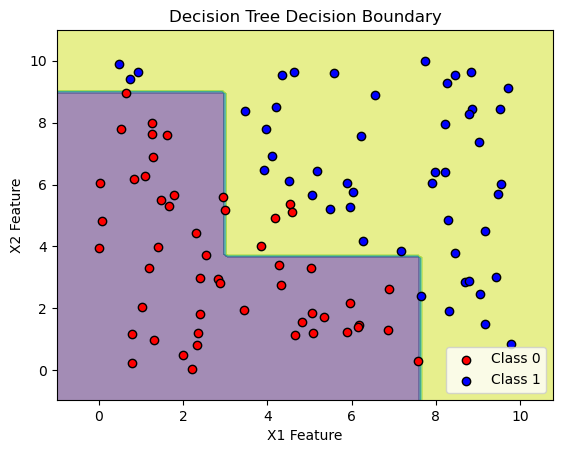

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic dataset again
# We are making a fake dataset of 100 points where each point has two numbers (X1, X2).
np.random.seed(23)
samples = 100
X1 = np.random.uniform(0, 10, samples) # 100 random numbers between 0 and 10
X2 = np.random.uniform(0, 10, samples) # Another 100 random numbers between 0 and 10
X = np.column_stack((X1, X2)) # Put them together as (X1, X2) pairs
y = (X1 + X2 > 10).astype(int) # If their sum is >10 then class 1 (blue) or else class 0 (red)

# Train the decision tree
decision_tree = build_decision_tree(X, y, max_depth=3, min_sample_split=5)

# Create a mesh grid for visualization
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100),np.linspace(x2_min, x2_max, 100))

# Predict on all grid points
grid_points = np.c_[xx1.ravel(), xx2.ravel()]
predictions = predict(decision_tree, grid_points)
predictions = predictions.reshape(xx1.shape)

# Plot decision boundary
plt.contourf(xx1, xx2, predictions, alpha=0.5, cmap=plt.cm.viridis)

# Plot original data points
plt.scatter(X1[y == 0], X2[y == 0], color='red', label='Class 0', edgecolors='k')
plt.scatter(X1[y == 1], X2[y == 1], color='blue', label='Class 1', edgecolors='k')

# Labels and title
plt.xlabel("X1 Feature")
plt.ylabel("X2 Feature")
plt.title("Decision Tree Decision Boundary")
plt.legend()
plt.show()

Observation : The tree is correctly separating the datapoints to class 0 and class 1 except for a very few which 
    remain misclassified when max_depth=3 .

## Adjusted the hyper-parameter max-depth for better results

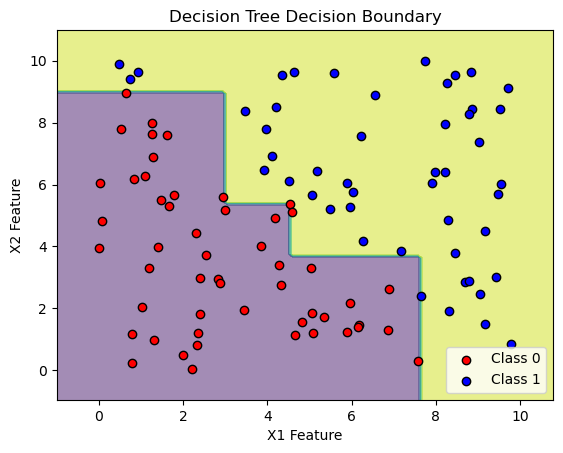

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic dataset again
np.random.seed(23)
samples = 100
X1 = np.random.uniform(0, 10, samples)
X2 = np.random.uniform(0, 10, samples)
X = np.column_stack((X1, X2))
y = (X1 + X2 > 10).astype(int)

# Train the decision tree
decision_tree = build_decision_tree(X, y, max_depth=5, min_sample_split=5)

# Create a mesh grid for visualization
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100),np.linspace(x2_min, x2_max, 100))

# Predict on all grid points
grid_points = np.c_[xx1.ravel(), xx2.ravel()] 
# Np.ravel(): Flattens a multi-demsional array to 1D but creates a view.In this case xx1 and xx2 are 2D arrays and ravel flattened them to 1D array
# np.c_ will column stack the values of [xx1.ravel(), xx2.ravel()]
predictions = predict(decision_tree, grid_points) # Predict class for each point
predictions = predictions.reshape(xx1.shape) # Reshape to match the grid or else it will throw an error.TypeError: Input z must be 2D, not 1D

# Plot decision boundary
plt.contourf(xx1, xx2, predictions, alpha=0.5,cmap=plt.cm.viridis)

# Plot original data points
plt.scatter(X1[y == 0], X2[y == 0], color='red', label='Class 0', edgecolors='k')
plt.scatter(X1[y == 1], X2[y == 1], color='blue', label='Class 1', edgecolors='k')

# Labels and title
plt.xlabel("X1 Feature")
plt.ylabel("X2 Feature")
plt.title("Decision Tree Decision Boundary")
plt.legend()
plt.show()

 When max_depth=5 we are getting better results .